In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from itertools import count

In [2]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [3]:
file = '/home/hydroassist/remote_disk/data/Chou/onoff/20190509_onoff.mat'

In [4]:
# %%script false 
def offsusID(file):
    mat = scipy.io.loadmat(file)
    TimeStamps = mat.get('TimeStamps')[0]
    spikes=mat.get('Spikes')
    Info = mat.get('Infos')
    DataLength = np.float32(Info[0][0][7][0][0])/1000 # sec
    T_span=[0,DataLength]
    sampling = np.float32(Info[0][0][1][0][0]) # Hz
    size_N = 60
    binning_time = 0.01
    channel_data = []
    spkID=[]
    for i in range(size_N):
        data=spikes[0][i][0] 
        channel_data.append(data) 
        spkID.append([i]*len(data))
    # calculate the firing rate
    N_bin = int((T_span[1]-T_span[0])/binning_time)+1 # number of bins
    bins = np.linspace(T_span[0], T_span[1], num=N_bin) # time point of data 
    binning_rates=[]
    for i in range(size_N):
        out = np.histogram(channel_data[i], bins)
        binning_rates.append(out[0]) 
    rate = np.array(binning_rates)
    offid = np.delete(np.array(list(range(28))),np.array(list(range(7)))*4)
    onstamp = TimeStamps.copy()
    delID = list(range(3,29,4))
    onstamp2 = np.delete(np.delete(onstamp,0),delID)
    offstamp = onstamp2+2
    ontotal = []
    offtotal = []
    for j in rate:
        for ontime,offtime in zip(onstamp2/binning_time,offstamp/binning_time):
            onspks = sum(j[int(ontime):int(ontime)+200])
            offspks = sum(j[int(offtime):int(offtime)+200])
            ontotal.append(onspks)
            offtotal.append(offspks)
    chonspks = np.sum(np.reshape(ontotal,[60,-1]),axis=1)
    choffspks = np.sum(np.reshape(offtotal,[60,-1]),axis=1)
    OffSustainCh = np.where(choffspks>chonspks*10)[0]
    return OffSustainCh

In [5]:
OffID = offsusID(file)

/home/hydroassist/.local/lib/python3.5/site-packages/ipykernel_launcher.py:29: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


In [6]:
print(OffID)

[23 49]


In [7]:
mat = scipy.io.loadmat(file)
TimeStamps = mat.get('TimeStamps')[0]
spikes=mat.get('Spikes')
stimulation=mat.get('a_data')
Info = mat.get('Infos')
DataLength = np.float32(Info[0][0][7][0][0])/1000 # sec
T_span=[0,DataLength]
sampling = np.float32(Info[0][0][1][0][0]) # Hz
triggerind = np.float16(TimeStamps[0]) # initial point, unit:s
size_N = 60
binning_time = 0.01
timedata = np.linspace(1., DataLength*sampling, num=int(DataLength*sampling))/sampling

In [8]:
signal = stimulation[2]
offid = np.delete(np.array(list(range(28))),np.array(list(range(7)))*4)
onstamp2 = TimeStamps.copy()
# delID = list(range(3,29,4))
# onstamp2 = np.delete(np.delete(onstamp,0),delID)
# offstamp = TimeStamps[offid]+2
offstamp = onstamp2+2

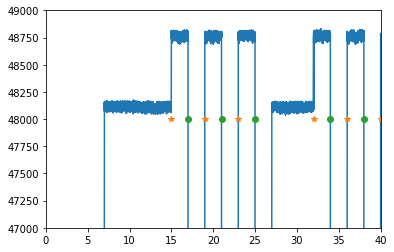

In [10]:
plt.plot(timedata,signal)
plt.plot(onstamp2,[48000]*len(onstamp2),'*')
plt.plot(offstamp,[48000]*len(offstamp),'o')
plt.xlim([0,40])
plt.ylim([47000,49000])
plt.show()

In [11]:
channel_data = []
spkID=[]
for i in range(size_N):
    data=spikes[0][i][0] 
    channel_data.append(data) 
    spkID.append([i]*len(data))
# calculate the firing rate
N_bin = int((T_span[1]-T_span[0])/binning_time)+1 # number of bins
bins = np.linspace(T_span[0], T_span[1], num=N_bin) # time point of data 
binning_rates=[]
for i in range(size_N):
    out = np.histogram(channel_data[i], bins)
    binning_rates.append(out[0]) 
rate = np.array(binning_rates)

In [12]:
bintime = np.array(list(range(len(rate[0]))))/100

In [13]:
tdata = np.concatenate(channel_data).ravel()
IDdata = np.concatenate(spkID).ravel() 

In [14]:
from bokeh.models import Span
from bokeh.layouts import column

In [15]:
p = figure()
p.scatter(tdata,IDdata)
for loc in onstamp2:
    vlineon_kw = dict(location=loc, dimension='height', line_color='green', line_width=1)
    p.add_layout(Span(**vlineon_kw))
    
for offloc in offstamp:
    vlineoff_kw = dict(location=offloc, dimension='height', line_color='red', line_width=1)
    p.add_layout(Span(**vlineoff_kw))
show(p)
# p1=figure()
# p1.line(timedata,signal)
# show(column(p1,p))

In [16]:
p = figure()
p.scatter(tdata,IDdata)
for loc in onstamp2:
    vlineon_kw = dict(location=loc, dimension='height', line_color='green', line_width=1)
    p.add_layout(Span(**vlineon_kw))
    
for offloc in offstamp:
    vlineoff_kw = dict(location=offloc, dimension='height', line_color='red', line_width=1)
    p.add_layout(Span(**vlineoff_kw))
show(p)
# p1=figure()
# p1.line(timedata,signal)
# show(column(p1,p))

In [17]:
# onspks
ontotal = []
offtotal = []
for j in rate:
    for ontime,offtime in zip(onstamp2/binning_time,offstamp/binning_time):
        onspks = sum(j[int(ontime):int(ontime)+200])
        offspks = sum(j[int(offtime):int(offtime)+200])
        ontotal.append(onspks)
        offtotal.append(offspks)

chonspks = np.sum(np.reshape(ontotal,[60,-1]),axis=1)
choffspks = np.sum(np.reshape(offtotal,[60,-1]),axis=1)

In [18]:
offsustain = (choffspks>chonspks*5)&(choffspks>np.mean(choffspks))
offch = np.where(offsustain)[0]
print(offch)

[ 5 23 48 49]


In [19]:
offch

array([ 5, 23, 48, 49])

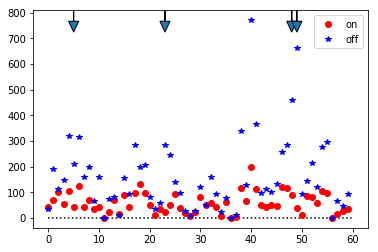

In [20]:
plt.plot(chonspks,'ro',label='on')
plt.plot(choffspks,'b*',label='off')
plt.legend()
Yrange = plt.gca().get_ylim()
ylimscl = Yrange[1]-Yrange[0]
for i in offch :
    plt.arrow(i,Yrange[1],0,-ylimscl*0.05,head_width=2, head_length=ylimscl*0.05)
plt.hlines(0,0,60,linestyles='dotted')
plt.show()

ID= 0 False


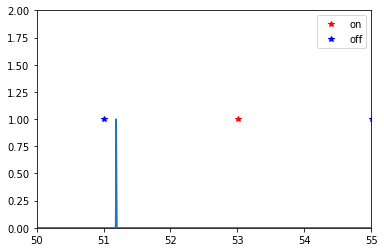

ID= 1 False


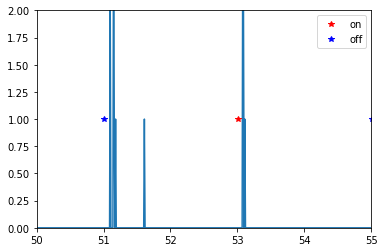

ID= 2 False


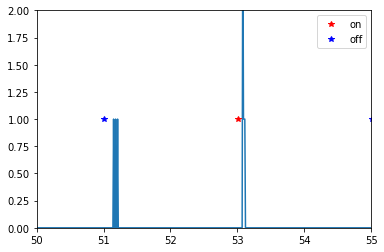

ID= 3 False


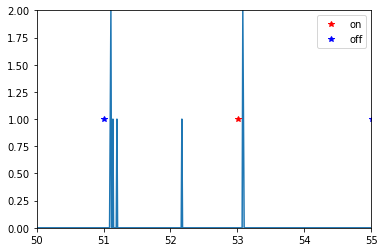

ID= 4 False


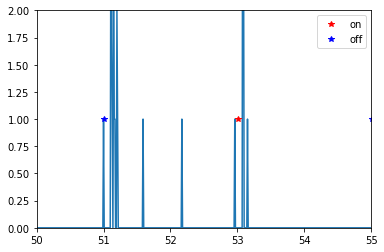

ID= 5 True


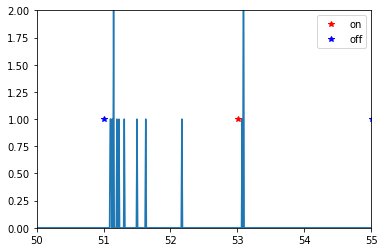

ID= 6 False


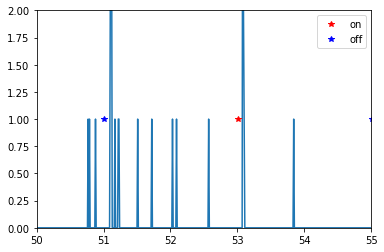

ID= 7 False


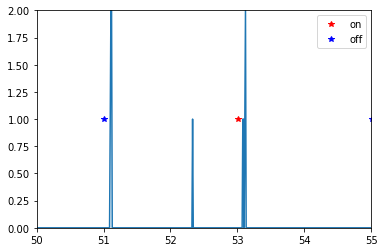

ID= 8 False


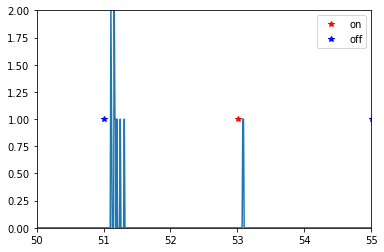

ID= 9 False


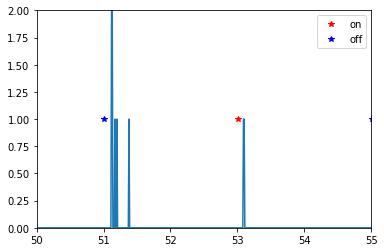

ID= 10 False


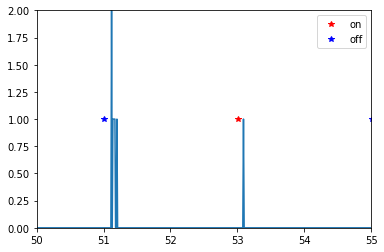

ID= 11 False


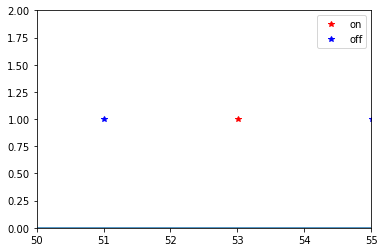

ID= 12 False


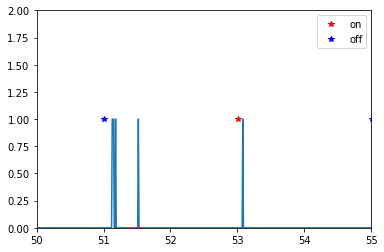

ID= 13 False


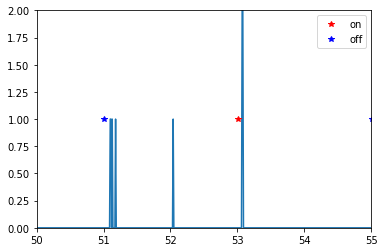

ID= 14 False


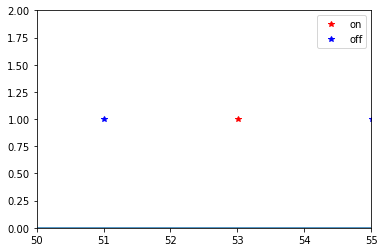

ID= 15 False


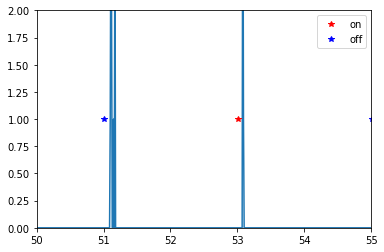

ID= 16 False


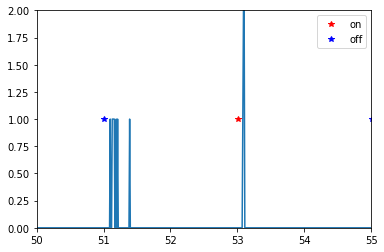

ID= 17 False


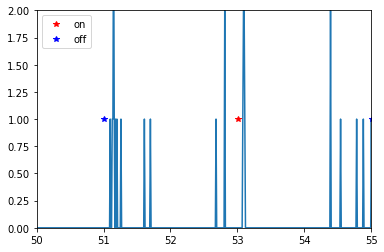

ID= 18 False


ID= 19 False


ID= 20 False


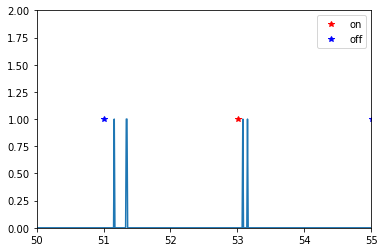

ID= 21 False


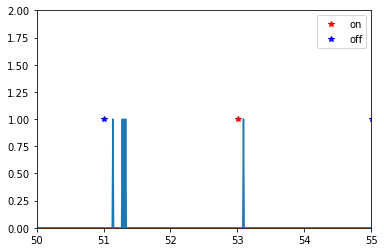

ID= 22 False


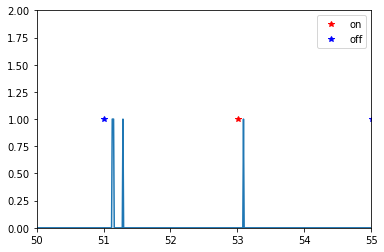

ID= 23 True


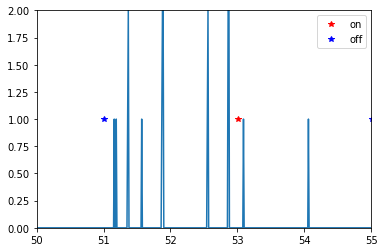

ID= 24 False


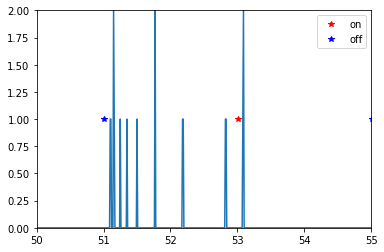

ID= 25 False


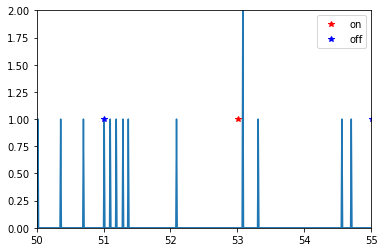

ID= 26 False


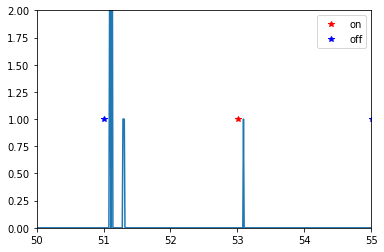

ID= 27 False


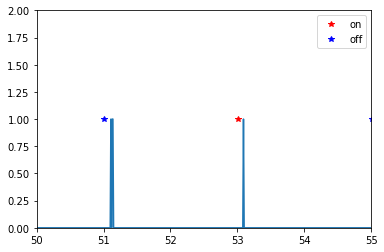

ID= 28 False


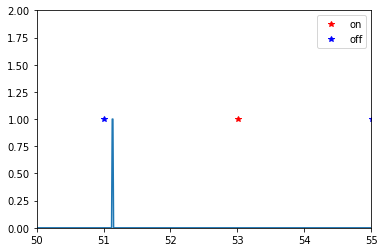

ID= 29 False


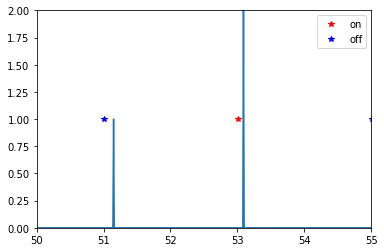

ID= 30 False


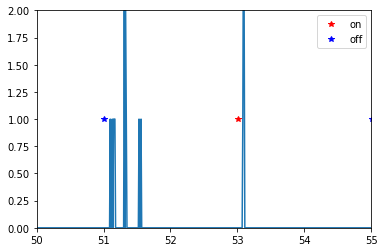

ID= 31 False


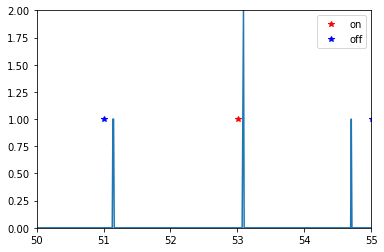

ID= 32 False


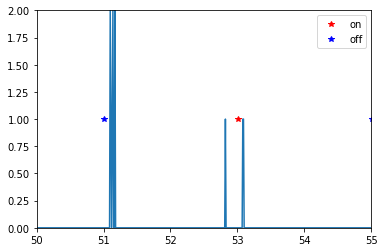

ID= 33 False


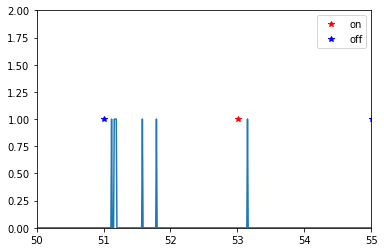

ID= 34 False


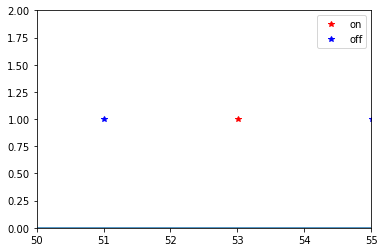

ID= 35 False


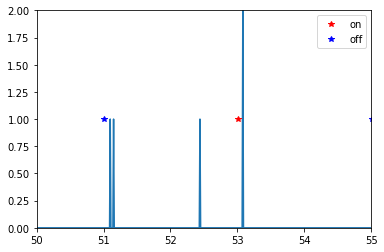

ID= 36 False


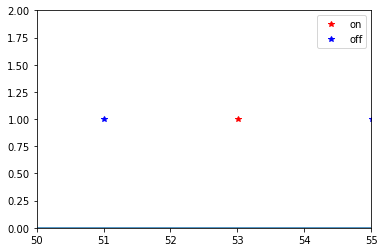

ID= 37 False


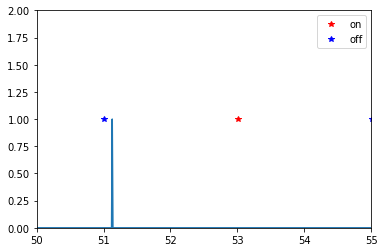

ID= 38 False


ID= 39 False


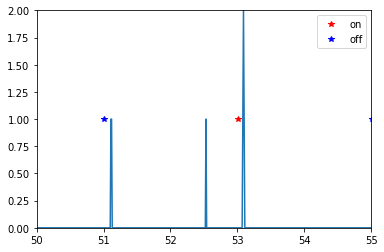

ID= 40 False


ID= 41 False


ID= 42 False


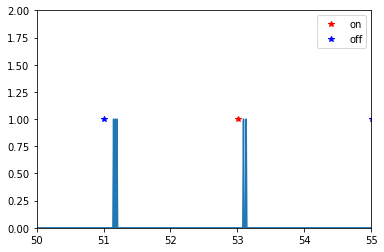

ID= 43 False


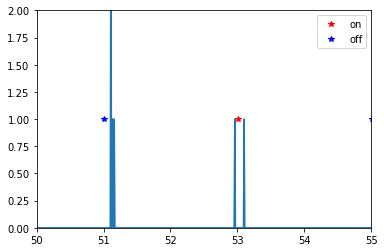

ID= 44 False


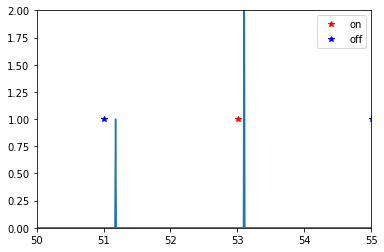

ID= 45 False


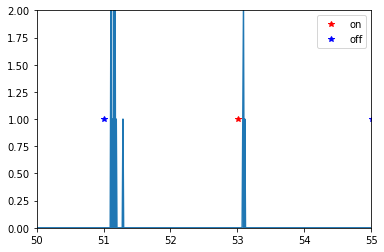

ID= 46 False


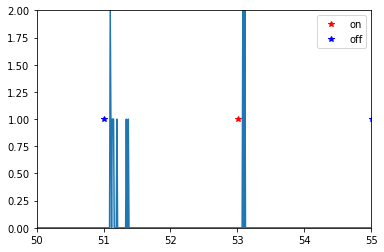

ID= 47 False


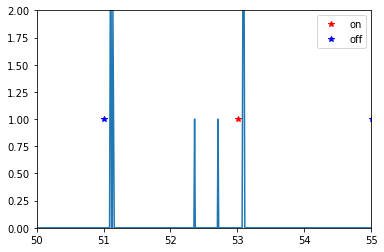

ID= 48 True


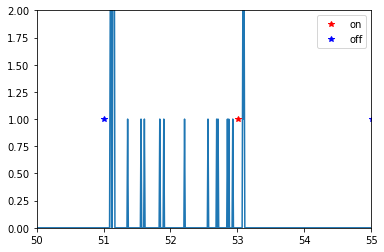

ID= 49 True


ID= 50 False


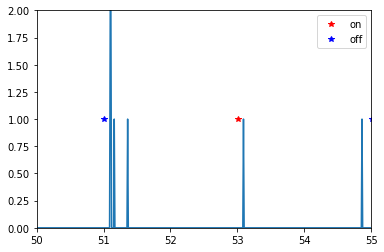

ID= 51 False


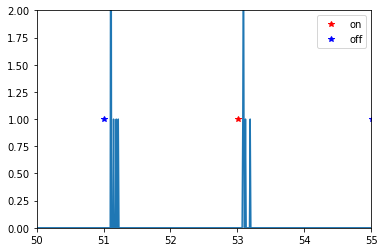

ID= 52 False


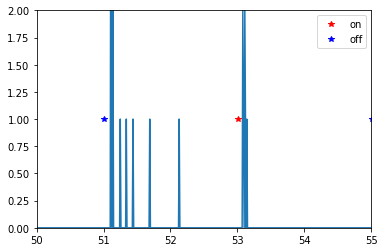

ID= 53 False


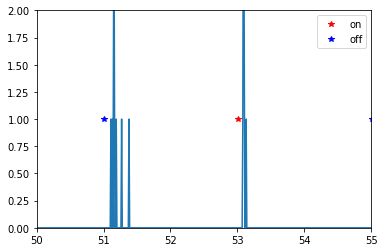

ID= 54 False


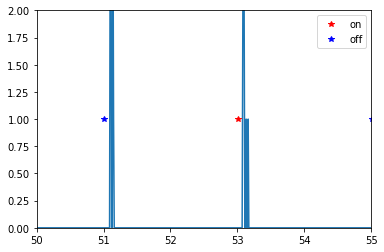

ID= 55 False


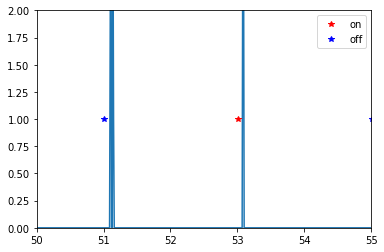

ID= 56 False


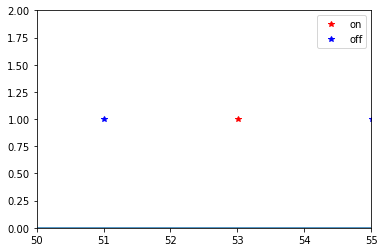

ID= 57 False


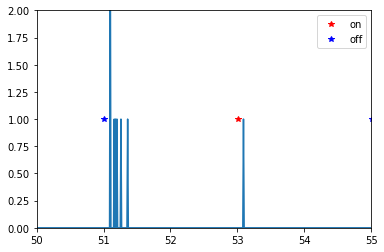

ID= 58 False


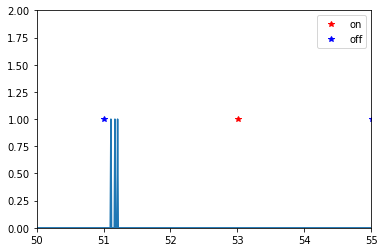

ID= 59 False


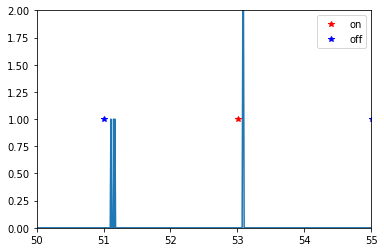

In [22]:
for counts,i,j in zip(count(),rate,offsustain ):
    print('ID=',counts,j)
    plt.plot(bintime,i)
    plt.plot(onstamp2,[1]*21,'r*',label='on')
    plt.plot(offstamp,[1]*21,'b*',label='off')
    plt.xlim([50,55])
    plt.ylim([0,2])
    plt.legend()
    plt.show()

In [27]:
file

'/home/hydroassist/remote_disk/data/Chou/onoff/20190509_onoff.mat'

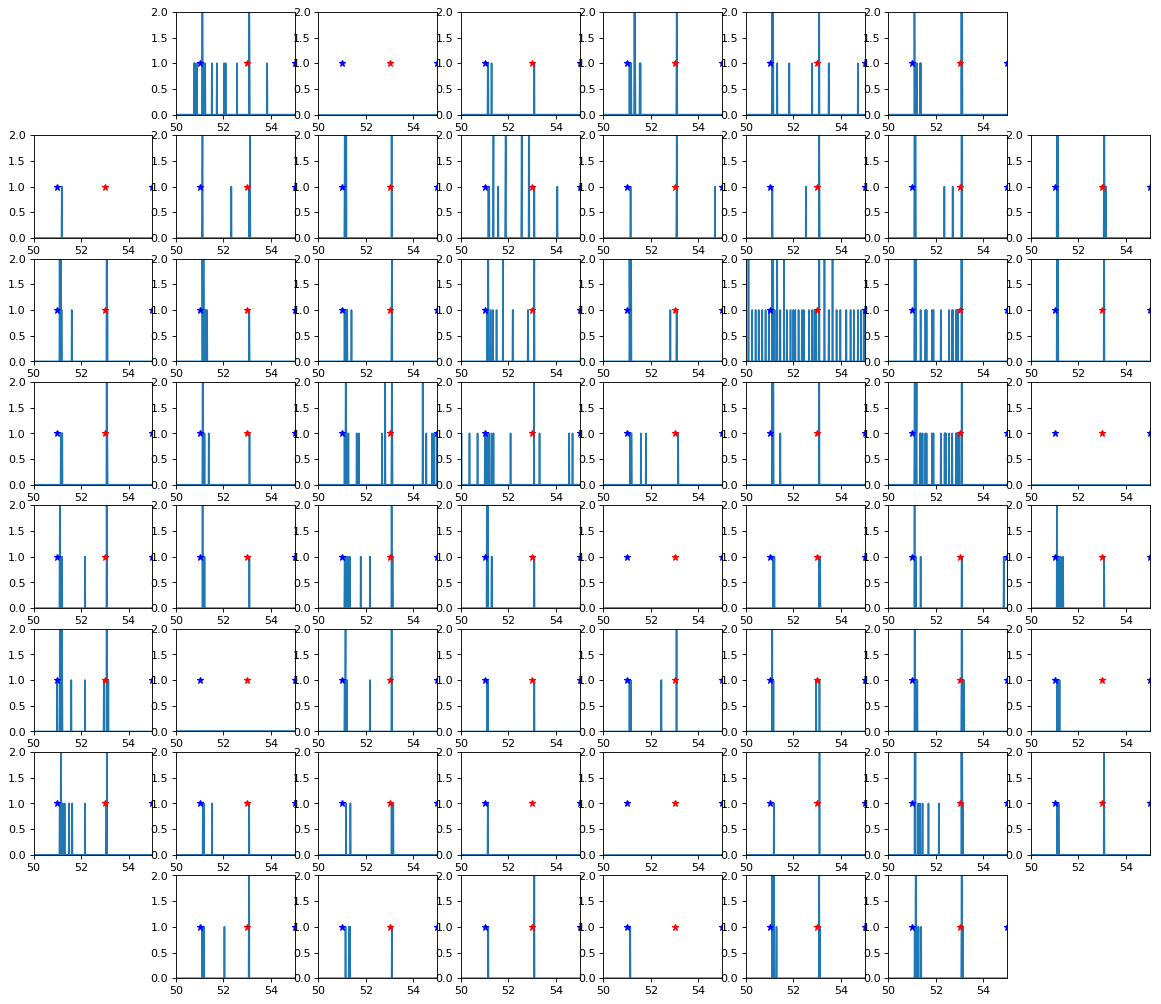

In [28]:
posind = np.double(list(range(64))).reshape(8,8).T.flatten().tolist()
posind.remove(0)
posind.remove(7)
posind.remove(56)
posind.remove(63)

colorcode = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'w']
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for counts,i,j in zip(count(),rate,offsustain ):
    plt.subplot(8,8,posind[counts]+1)
    plt.plot(bintime,i)
    plt.plot(onstamp2,[1]*21,'r*',label='on')
    plt.plot(offstamp,[1]*21,'b*',label='off')
    plt.xlim([50,55])
    plt.ylim([0,2])
plt.savefig(file[:-4] + '_onoffspks' +'.png', bbox_inches='tight')#,transparent=True
plt.show()